# 02-peak-local-max.ipynb
This notebook is similar continues the segmentation procedure outline in `README.md`, with a different step for determing the local maxima. 
Steps performed here include:
- [Load data](#load-data)
- [(C) Calculate local maxima for foreground seeds](#c-calculate-local-maxima-for-foreground-seeds)
- [(D) Calculate local maxima of gradient for background seeds](#d-calculate-local-maxima-of_gradient-for-background-seeds)

# Import packages

In [19]:
# Standard library imports
from pathlib import Path
import sys
# Third-party imports
import imagecodecs  # dependency required for loading compressed tif images
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature, filters, morphology, util
# Local imports
sys.path.insert(0, Path('..'))
import helpers

# Load data

In [20]:
project_dir = Path('..').resolve()
print(project_dir)

C:\Users\gusb\Research\mhe-analysis


In [21]:
img_path = Path(project_dir / 'IDOX_500.tif')   
img = iio.imread(img_path)
print(f'{img.shape=}')
print(f'{img.dtype=}')

img.shape=(1004, 924)
img.dtype=dtype('uint16')


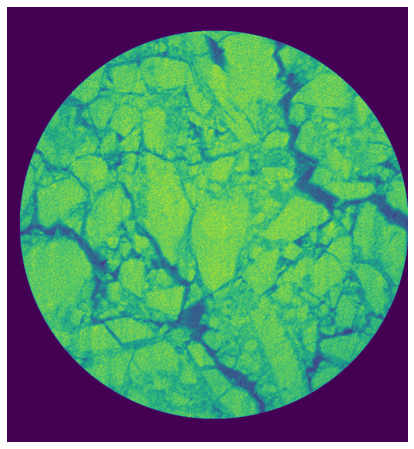

In [22]:
fig, ax = helpers.plot_img(img)

## Smooth image

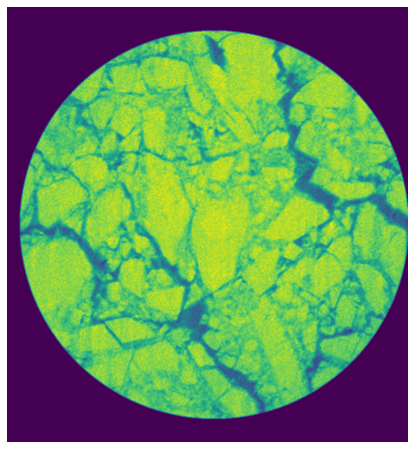

In [23]:
img_smooth = filters.gaussian(img)
fig, ax = helpers.plot_img(img_smooth)

# (C) Calculate local maxima for foreground seeds

## Use `skimage.feature.peak_local_max()` to calculate local maxima

In [24]:
maxima = feature.peak_local_max(img_smooth, min_distance=20)
print(f'{maxima.shape=}')
print(f'{maxima[0]=}')

maxima.shape=(269, 2)
maxima[0]=array([501, 747], dtype=int64)


In [25]:
def plot_img_max(img, min_distance):
    maxima = feature.peak_local_max(img, min_distance=min_distance)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis('off')
    ax.imshow(img)
    ax.scatter(maxima[:, 1], maxima[:, 0], c='red')
    return fig, ax

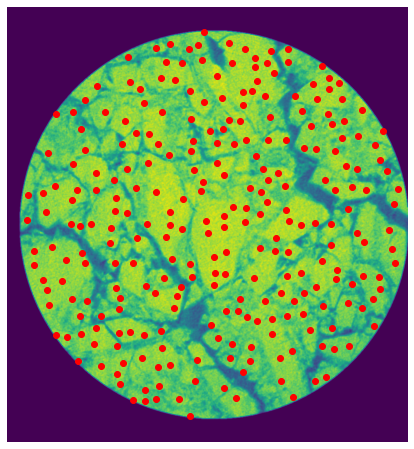

In [26]:
fig, ax = plot_img_max(img_smooth, 20)

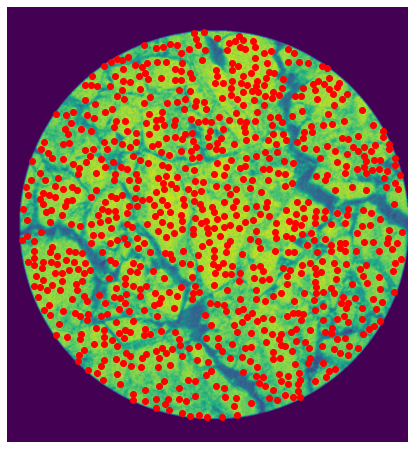

In [27]:
fig, ax = plot_img_max(img_smooth, 10)

# (D) Calculate local maxima of gradient for background seeds

## Calculate gradient

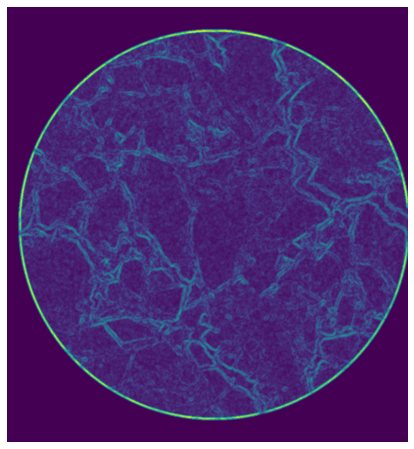

In [28]:
grad = filters.rank.gradient(util.img_as_ubyte(img_smooth), morphology.disk(3))
fig, ax = helpers.plot_img(grad)

## Calculate local maxima using `skimage.feature.peak_local_max()`

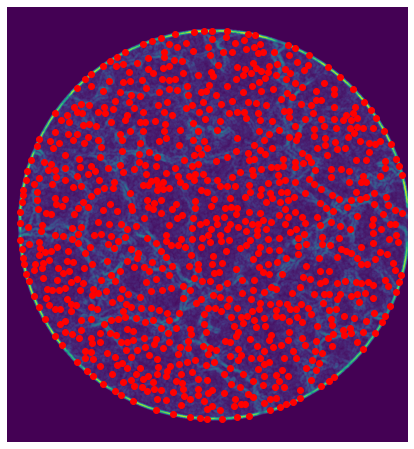

In [35]:
fig, ax = plot_img_max(grad, 10)